In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl

In [15]:
# 한글 적용 함수

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
mpl.rcParams['axes.unicode_minus'] = False

['NanumGothic'] 10.0


# PCA

In [13]:
def visualize_pca_components(X, y, feature_names):
    # 데이터 스케일링부터 해야한다. 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA수행
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # 설명된 분산 비율 시각화
    plt.figure(figsize = (10,4))
    # 1행, 2열의 형태로 플롯을 출력한다.
    plt.subplot(1,2,1)

    # 주성분 개수에 떄른 설명된 분산 비율의 누적합 계산
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

    # 95% 이상의 분산을 설명하는 최소 개수의 주성분 개수 찾기
    n_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1

    # 라인 차트 그리기
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
             explained_variance_ratio_cumsum, 'bo-')
    
    # 95%지점 표시
    plt.axhline(y = 0.95, color = 'r', linestyle = '--', alpha = 0.5)
    plt.axvline(x = n_components_95, color = 'r', linestyle = '--', alpha = 0.5)

    plt.xlabel('num of main components')
    plt.ylabel('cumsum of explained var')
    plt.title(f"PCA explained var ratio, best num of component; {n_components_95}")

    # 첫 세 개의 주성분으로 데이터 산점도 시각화
    plt.subplot(1,2,2)
    scatter = plt.scatter(X_pca[ : , 0], X_pca[ : , 1], c = y, cmap = 'viridis')
    plt.xlabel('첫번째 주성분')
    plt.ylabel('두번째 주성분')
    plt.title('PCA 변환 결과')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

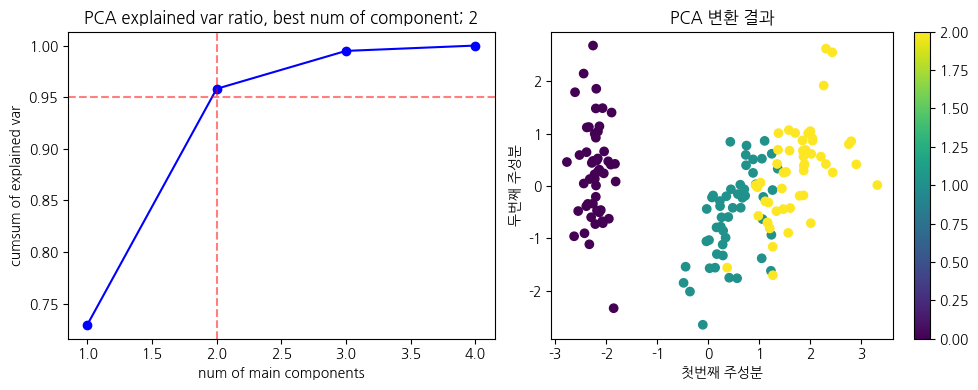

In [16]:
# test upper func
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

visualize_pca_components(X,y,feature_names)

## read credit card data

In [4]:
data = pd.read_csv('credit_card.txt')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = data.target

AttributeError: 'DataFrame' object has no attribute 'target'